In [6]:
!pip install opencv-python


In [7]:
import cv2
print(cv2.__version__)

4.10.0


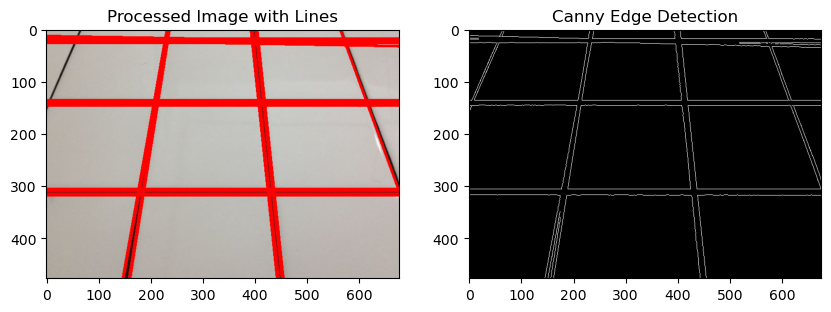

Processed image saved as robolin-tiles-1.jpg


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image location
loc = r"C:\Users\TavishiS\Downloads\robolin-tiles1.jpg" # Replace with your actual image path

# Extract digits from the location string
n = "".join([s for s in loc if s.isdigit()])

# Read the image from the provided location
img = cv2.imread(loc)
if img is None:
    print(f"Error: Unable to open image file {loc}")
else:
    # Apply bilateral filter to the image
    img_filtered = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

    # Convert the image to grayscale
    bandw = cv2.cvtColor(img_filtered, cv2.COLOR_BGR2GRAY)

    # Compute median and set Canny thresholds
    v = np.median(bandw)
    sigma = 0.33
    lower_thresh = int(max(0, (1.0 - sigma) * v))
    upper_thresh = int(min(255, (1.0 + sigma) * v))

    # Apply Canny edge detection
    cannyimg = cv2.Canny(bandw, lower_thresh, upper_thresh, apertureSize=3)

    # Apply Hough Line Transform to detect lines
    lines = cv2.HoughLines(cannyimg, 1, np.pi/180, 150)
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 3)

    # Display the original image and the processed image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Processed Image with Lines")

    plt.subplot(1, 2, 2)
    plt.imshow(cannyimg, cmap='gray')
    plt.title("Canny Edge Detection")

    plt.show()

    # Ensure n is not empty; fallback to a default name if no digits were found
    if not n:
        n = "output"

    # Save the processed image with the detected lines
    output_filename = f'robolin-tiles-{n}.jpg'
    cv2.imwrite(output_filename, img)
    print(f"Processed image saved as {output_filename}")
